# **Question 2:**

**(1)**load dataset


In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data,
columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**(2)**Preprocess

In [2]:
import sklearn
boston_dataset.target = boston_dataset.target.reshape(boston_dataset.target.shape[0],1)
sklearn.preprocessing.normalize(boston_dataset.data, norm='max', axis=0, copy=False, return_norm=False)
sklearn.preprocessing.normalize(boston_dataset.target, norm='max', axis=0, copy=False, return_norm=False)

#print(boston_dataset.target)
boston = pd.DataFrame(boston_dataset.data,
columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000071,0.18,0.083273,0.0,0.617681,0.748861,0.652,0.337278,0.041667,0.416315,0.695455,1.000000,0.131156,0.480
1,0.000307,0.00,0.254867,0.0,0.538462,0.731321,0.789,0.409607,0.083333,0.340366,0.809091,1.000000,0.240716,0.432
2,0.000307,0.00,0.254867,0.0,0.538462,0.818337,0.611,0.409607,0.083333,0.340366,0.809091,0.989746,0.106136,0.694
3,0.000364,0.00,0.078587,0.0,0.525832,0.797039,0.458,0.499913,0.125000,0.312236,0.850000,0.994281,0.077430,0.668
4,0.000776,0.00,0.078587,0.0,0.525832,0.814009,0.542,0.499913,0.125000,0.312236,0.850000,1.000000,0.140374,0.724


(3)put a test on train_test_split() to split dataset 80-20 train-test for one time.

In [3]:
from sklearn.model_selection import train_test_split
X = boston_dataset.data
y = boston_dataset.target

print('Xshape: ', X.shape)
print('yshape: ', y.shape)

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, shuffle = True)
print('train_Xshape: ', train_X.shape)
print('train_yshape: ', train_y.shape)
print('test_Xshape: ', test_X.shape)
print('test_yshape: ', test_y.shape)

Xshape:  (506, 13)
yshape:  (506, 1)
train_Xshape:  (404, 13)
train_yshape:  (404, 1)
test_Xshape:  (102, 13)
test_yshape:  (102, 1)


**(4)Because I am little bit confused about exactly required method to implement 10-fold, I made it by two ways as below:**

**(4)(a)**do 10-Fold and ridge regression by repeating 10 times of splitting 80-20 train and test, each split will shuffle dataset

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import RidgeCV

MAXRSQ = 0
Rsq = []

for iteration in range(10):
  train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, shuffle = True)
  reg = RidgeCV(alphas=np.logspace(-6, 6, 13))
  reg.fit(train_X, train_y)
  #print("coef:",reg.coef_)
  #print("intercept:",reg.intercept_)
  R2 = reg.score(test_X, test_y, sample_weight=None)
  Rsq.append(R2)
  if Rsq[-1] > MAXRSQ:
    MAXRSQ = Rsq[-1]
print("R^2s: ",Rsq) 
print("max R^2: ",MAXRSQ )  

R^2s:  [0.6837327228847304, 0.7047967750266928, 0.7530466654207459, 0.7384331773752518, 0.7031074193275669, 0.6186253420040251, 0.7017469855969185, 0.7202389983969888, 0.7167646523380236, 0.7739848718307807]
max R^2:  0.7739848718307807


**(4)(b)**do 10-Fold and ridge regression by performing KFold function from sklearn on 80% dataset (train set), and apply best model to 20% dataset ( test set) at last.

      KFold divide train set into k equal parts and use one parts as test set each time and iterate k times , at last choose best model. 

In [5]:
from sklearn.model_selection import KFold
from sklearn.linear_model import RidgeCV

kf = KFold(n_splits=10)
kf.get_n_splits(train_X)
MAXRSQ = 0
Rsq = []

for train_index, test_index in kf.split(train_X):
  #print("TRAIN:", train_index, "TEST:", test_index)
  X_kftrain, X_kftest = train_X[train_index], train_X[test_index]
  y_kftrain, y_kftest = train_y[train_index], train_y[test_index]
  reg = RidgeCV(alphas=np.logspace(-6, 6, 13))
  reg.fit(X_kftrain, y_kftrain)
  #print("coef:",reg.coef_)
  #print("intercept:",reg.intercept_)
  R2 = reg.score(X_kftest, y_kftest, sample_weight=None)
  Rsq.append(R2)
  if Rsq[-1] > MAXRSQ:
    REG = reg
    MAXRSQ = Rsq[-1]
print("R^2: ",Rsq) 
print("max R^2: ",MAXRSQ )  

R^2:  [0.823775621723068, 0.6375829846526994, 0.6658874977119492, 0.40333683901120754, 0.7032820980040273, 0.8482473462532901, 0.8396013728023393, 0.5896609039955862, 0.7762145978564324, 0.5757353115055683]
max R^2:  0.8482473462532901


apply best model gained from 4(b) to test set and report R^2

In [6]:
R2 = REG.score(test_X, test_y, sample_weight=None)
print('R^2 for test set: ',R2 )

R^2 for test set:  0.7668737733975907


# **Question 4**

# **(a)**

x1.shape: (100, 2)
x2.shape: (100, 2)
y1.shape: (100, 1)
y2.shape: (100, 1)


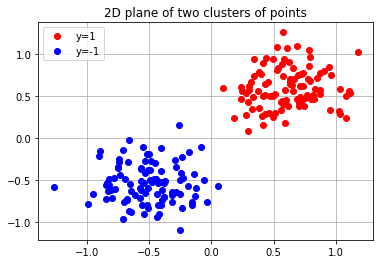

In [26]:
import numpy as np
import matplotlib.pyplot as plt
meanx1 = (0.6, 0.6)
covx1 = [[0.05, 0], [0, 0.05]]
x1 = np.random.multivariate_normal(meanx1, covx1, 100)
meanx2 = (-0.5, -0.5)
covx2 = [[0.06, 0], [0, 0.06]]
x2 = np.random.multivariate_normal(meanx2, covx2, 100)
print("x1.shape:" ,x1.shape)
print("x2.shape:" ,x2.shape)
plt.figure(1)
plt.title("2D plane of two clusters of points")
plt.plot(x1[:,0],x1[:,1],'ro',label="y=1")
plt.plot(x2[:,0],x2[:,1],'bo',label="y=-1")
plt.legend()
plt.grid()

y1 = np.random.normal(loc=1.0, scale=0.0, size=100)
y2 = np.random.normal(loc=-1.0, scale=0.0, size=100)
y1 = y1.reshape(y1.shape[0],1)
y2 = y2.reshape(y2.shape[0],1)
print("y1.shape:" ,y1.shape)
print("y2.shape:" ,y2.shape)

# **(b)because yi equals to 1 or -1, I solve this question by two methods as below:**

Method(1): According to what we learn, deduce a formula suits 1 & -1 situation

Method(2): use formula for 1 and 0 as we learnt in class, preprocess all -1 to 0.

define function for solving lgistic regression, it will shuffle dataset before iteration. It will stop iteration if it converges ( judge by loss funtion variation less than 0.1%. (this helps solving question (c)

Set mode argument to 1 to use a formula for 1 & -1, set mode argument to 2 to use formula in class for 1 & 0

In [0]:
def gradient_descent(X,y,learning_rate,epoch,mode):
  import time
  
  #preoprocess: make all -1 to 0 if mode = 2
  if mode == 2 :
    print("GD Result when use 1 & 0 formula learnt in class:")
    for n in range(X.shape[0]):
      if y[n] == -1 :
        y[n] = 0
  if mode == 1 :
    print("GD Result when use 1 & -1 formula from my deduction:")
    for n in range(X.shape[0]):
      if y[n] == 0 :
        y[n] = -1

  #preproess X and y: shuffle X,y pairs
  #combine X & y, shuffle and then split
  pairs = np.concatenate((X, y), axis=1)
  #print("pairs.shape: ",pairs.shape,"pairs:")
  np.random.shuffle(pairs)
  #print(pairs)
  X = pairs[:,0:pairs.shape[1]-1]
  y = pairs[:,pairs.shape[1]-1:pairs.shape[1]]
  #print(X)
  #print(y)
  
  n = X.shape[0]
  d = X.shape[1]
  x0 = np.ones((n,1))
  X = np.hstack((x0,X))# add a column of 1 to the left of x matching for w0
  w = np.random.randn(d+1,1)
  print("X.shape: ",X.shape," y.shape: ",y.shape," w.shape: ",w.shape)
  
  cost = []
  gd = []
  t0 = time.time()
  for iteration in range(epoch):
    Lw = 0
    gradient = np.zeros((d+1,1))
    for i in range(0,n):
      Xi = X[i].reshape(1,X[i].shape[0])
      fx = ( 1+np.exp((-1)*np.matmul(Xi,w)) )**(-1)# Sigmoid
      if mode == 1 : #use formula for 1 & -1
        gradient = gradient - ( (1+ y[i])/2 - fx ) * Xi.T
        Lw = Lw +  (-1)*(  (1+y[i])/2 * np.log( fx ) + (1-y[i])/2 * np.log( 1 - fx ) ) 
      if mode == 2 : #use formula for 1 & 0
        gradient = gradient - ( y[i] - fx ) * Xi.T
        Lw = Lw +  (-1)*(  y[i] * np.log( fx ) + (1-y[i]) * np.log( 1 - fx ) ) 
    w = w - learning_rate * gradient
    cost.append(Lw)
    gd.append(gradient)
    if len(cost) > 1 and abs(Lw - cost[-2]) / abs(cost[-2]) < 0.001:
      break
    # print("Lw:  ",Lw)
    # print("gradient: ",gradient)
  run_time = time.time() - t0
  print("converge at ",iteration+1,"th epoch")
  print("iteration time: ", run_time)

  gd = np.array(gd)
  cost = np.array(cost)
  cost = cost.reshape(cost.shape[0],1)
  iterations = range(1,iteration+2)
  print("time per iteration : ", run_time / epoch)
  plt.figure(2)
  plt.title("Gradient Variation with Epoch")
  plt.plot(iterations,gd[:,0],'r',label = "d=0")
  plt.plot(iterations,gd[:,1],'b',label = "d=1")
  plt.plot(iterations,gd[:,2],'g',label = "d=2")
  plt.grid()
  plt.legend()
  plt.xlabel("epoch")
  plt.ylabel("Gradient[d]")
    
  plt.figure(3)
  plt.title("L(w) Variation with Epoch")
  plt.plot(iterations,cost,'r')
  plt.xlabel("epoch")
  plt.ylabel("L(w)")
  plt.grid()
  print("w: ")
  print(w)
  print("Last Gradient: ")
  print(gd[-1])
  print("Loss (Lw): ",cost[-1])
  return w

combine two cluster of points together and train the logistic regression model

GD Result when use 1 & 0 formula learnt in class:
X.shape:  (160, 3)  y.shape:  (160, 1)  w.shape:  (3, 1)
converge at  55 th epoch
iteration time:  0.2302231788635254
time per iteration :  0.001151115894317627
w: 
[[-0.73405886]
 [ 7.15831395]
 [ 6.88834324]]
Last Gradient: 
[[ 0.02941278]
 [-0.24599076]
 [-0.1599582 ]]
Loss (Lw):  [0.98526853]


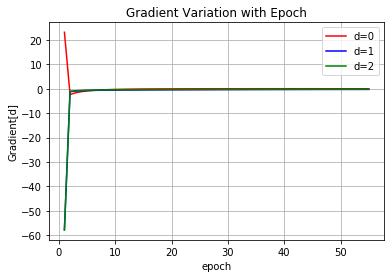

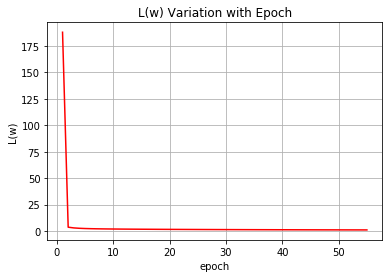

In [124]:
X = np.concatenate((x1, x2), axis=0)
#print("X.shape: ",X.shape,"X:")
#print(X)
y = np.concatenate((y1, y2), axis=0)
#print("y.shape: ",y.shape,"y:")
#print(y)
Train_X, Test_X, Train_y, Test_y = train_test_split(X, y, test_size=0.2, shuffle = True)

gdw = gradient_descent(Train_X,Train_y,0.1,200,mode = 2)

# **(c)**

define a function to generate indices of mini batch 

In [0]:
def mini_batch(full_size,mini_size):
  import numpy as np
  fullbatch = []
  for n in range(full_size):
    fullbatch.append(n)
  #print("full batch: ",fullbatch)
  np.random.shuffle(fullbatch)
  minibatch = fullbatch[0:100]
  #print(len(minibatch))
  #print("mini batch: ",minibatch)
  return minibatch
#mini_batch(200,100)  

According to function above to define a function for mini_batch gradient descent

In [0]:
def mini_batch_gd(X,y,learning_rate,epoch,mode,batch_size = X.shape[0]):
  import time
  
  if batch_size > X.shape[0] :
    print("batch size > sample amount")
    return 0
  #preoprocess: make all -1 to 0 if mode = 2
  if mode == 2 :
    print("SGD Result when use 1 & 0 formula learnt in class:")
    for n in range(X.shape[0]):
      if y[n] == -1 :
        y[n] = 0
  if mode == 1 :
    print("SGD Result when use 1 & -1 formula from my deduction:")
    for n in range(X.shape[0]):
      if y[n] == 0 :
        y[n] = -1

  #preproess X and y: shuffle X,y pairs #first combine X & y, shuffle and then split
  pairs = np.concatenate((X, y), axis=1)
  #print("pairs.shape: ",pairs.shape,"pairs:")
  np.random.shuffle(pairs)
  #print(pairs)
  X = pairs[:,0:pairs.shape[1]-1]
  y = pairs[:,pairs.shape[1]-1:pairs.shape[1]]
  
  n = X.shape[0]
  d = X.shape[1]
  x0 = np.ones((n,1))
  X = np.hstack((x0,X))# add a column of 1 to the left of x matching for w0
  w = np.random.randn(d+1,1)
  print("X.shape: ",X.shape," y.shape: ",y.shape," w.shape: ",w.shape)
  
  cost = []
  gd = []
  t0 = time.time()
  for k in range(epoch):
    Lw = 0
    gradient = np.zeros((d+1,1))
    minibatch = mini_batch(n,batch_size)
    for i in range(0,batch_size):
      Xi = X[minibatch[i]].reshape(1,X[minibatch[i]].shape[0])
      fx = ( 1+np.exp((-1)*np.matmul(Xi,w)) )**(-1)# Sigmoid
      if mode == 1 : #use formula for 1 & -1
        gradient = gradient - ( (1+ y[minibatch[i]])/2 - fx ) * Xi.T
        Lw = Lw +  (-1)*(  (1+y[minibatch[i]])/2 * np.log( fx ) + (1-y[minibatch[i]])/2 * np.log( 1 - fx ) ) 
      if mode == 2 : #use formula for 1 & 0
        gradient = gradient - ( y[minibatch[i]] - fx ) * Xi.T
        Lw = Lw +  (-1)*(  y[minibatch[i]] * np.log( fx ) + (1-y[minibatch[i]]) * np.log( 1 - fx ) ) 
    learning_rate = learning_rate / (k+1)
    w = w - learning_rate * gradient
    cost.append(Lw)
    gd.append(gradient)
    if len(cost) > 1 and abs(Lw - cost[-2]) / abs(cost[-2]) < 0.001:
      break
    # print("Lw:  ",Lw)
    # print("gradient: ",gradient)
  run_time = time.time() - t0
  print("converge at ",k+1,"th epoch")
  print("iteration time: ", run_time)
  print("time per iteration : ", run_time / epoch)
  gd = np.array(gd)
  cost = np.array(cost)
  cost = cost.reshape(cost.shape[0],1)
  iterations = range(1,k+2)

  plt.figure(2)
  plt.title("Gradient Variation with Epoch")
  plt.plot(iterations,gd[:,0],'r',label = "d=0")
  plt.plot(iterations,gd[:,1],'b',label = "d=1")
  plt.plot(iterations,gd[:,2],'g',label = "d=2")
  plt.grid()
  plt.legend()
  plt.xlabel("epoch")
  plt.ylabel("Gradient[d]")
    
  plt.figure(3)
  plt.title("L(w) Variation with Epoch")
  plt.plot(iterations,cost,'r')
  plt.xlabel("epoch")
  plt.ylabel("L(w)")
  plt.grid()
  print("w: ")
  print(w)
  print("Last Gradient: ")
  print(gd[-1])
  print("Loss (Lw): ",cost[-1])
  return w

SGD Result when use 1 & 0 formula learnt in class:
X.shape:  (160, 3)  y.shape:  (160, 1)  w.shape:  (3, 1)
converge at  241 th epoch
iteration time:  0.3034689426422119
time per iteration :  0.0007586723566055298
w: 
[[-0.0960937 ]
 [ 2.45887669]
 [ 1.39480995]]
Last Gradient: 
[[ 0.18888454]
 [-2.6224503 ]
 [-2.8895921 ]]
Loss (Lw):  [6.35308716]


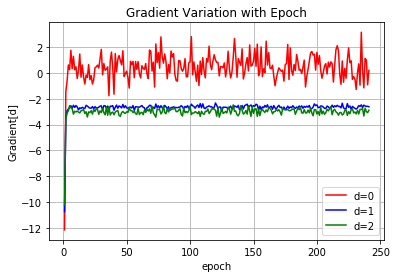

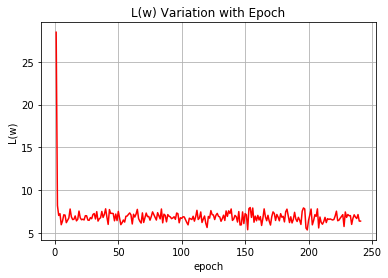

In [166]:
sgdw = mini_batch_gd(Train_X,Train_y,0.1,400,2,50)

**(d)Visualize correctness of models**

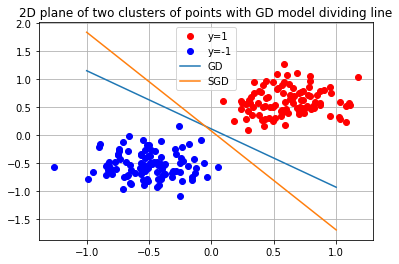

In [169]:
plt.figure()
plt.title("2D plane of two clusters of points with GD model dividing line")
plt.plot(x1[:,0],x1[:,1],'ro',label="y=1")
plt.plot(x2[:,0],x2[:,1],'bo',label="y=-1")
#plt.plot(x2[:,0],x2[:,1],'bo',label="Wrong Predition")
linex1 = [-1 , 1]
#when w0 + w1*x1 + w2*x2 = 0 (as input of sigmoid), probability outcome after sigmoid = 0.5 , when > 0.5 , judge as 1
linex2 = (0.0 - gdw[0] - gdw[1]*linex1) / gdw[2]
plt.plot(linex1,linex2,label = "GD")
linex4 = (0.0 - sgdw[0] - sgdw[1]*linex1) / sgdw[2]
plt.plot(linex1,linex4,label = "SGD")
# linex3 = (0.5 - gdw[0] - gdw[1]*linex1) / gdw[2]
# plt.plot(linex1,linex3,label = "model0.5")
plt.legend()
plt.grid()